<a href="https://colab.research.google.com/github/hhanhvu99/CS114.L21.KHCL/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tham khảo: 
# https://github.com/buidung2004/CS114.L21/blob/main/Assignment/26-04/Linear_Regession.ipynb
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ server
column = ['Size', 'Time']
train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names=column)
test = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names=column)

In [ ]:
# Lấy data input và output
x_train = np.array(train['Size']).reshape(-1,1)
y_train = np.array(train['Time'])

x_test = np.array(test['Size']).reshape(-1,1)
y_test = np.array(test['Time'])

In [ ]:
def increaseDimension(X_):
  X = X_
  X = np.hstack((X, np.log2(X_)))
  X = np.hstack((X, X_*np.log2(X_)))
  X = np.hstack((X, X_*X_))

  return X

# Chuyển từ 1 chiều sang 4 chiều
x_train_4_dim = increaseDimension(x_train).reshape(-1, 4)
x_test_4_dim = increaseDimension(x_test).reshape(-1, 4)

In [ ]:
print(x_train_4_dim)

[[6.08369500e+06 2.25365164e+01 1.37105292e+08 3.70113449e+13]
 [1.95436700e+06 2.08982700e+01 4.08428892e+07 3.81955037e+12]
 [3.73418500e+06 2.18323620e+01 8.15260786e+07 1.39441376e+13]
 ...
 [9.83736400e+06 2.32298404e+01 2.28520395e+08 9.67737305e+13]
 [9.46659300e+06 2.31744139e+01 2.19382744e+08 8.96163830e+13]
 [4.08080100e+06 2.19604209e+01 8.96161077e+07 1.66529368e+13]]


In [ ]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(x_train_4_dim, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Nguồn: https://github.com/buidung2004/CS114.L21/blob/main/Assignment/26-04/Linear_Regession.ipynb
# Vẽ đồ thị
def drawPlot(x, y, model):
  plt.subplots(figsize=(10,10))
  plt.scatter(x, y)
  y_pred = np.array(model.predict(x))
  plt.scatter(x, y_pred)
  plt.show()

# Vẽ đồ thị với vector 4 chiều
def drawPlot4Dimension(x, x4Dim, y, model):
  plt.subplots(figsize=(10,10))
  plt.scatter(x, y)
  y_pred = np.array(model.predict(x4Dim))
  plt.scatter(x, y_pred)
  plt.show()

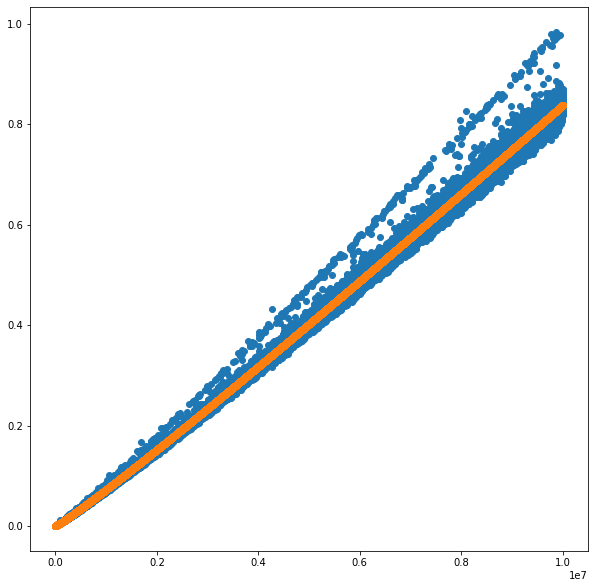

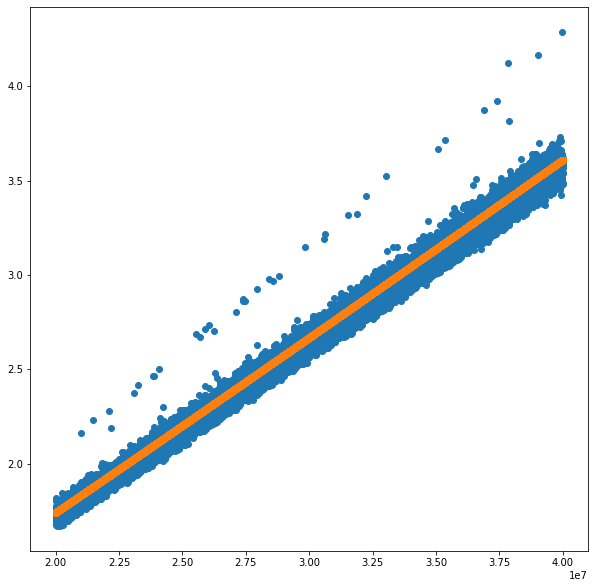

In [ ]:
drawPlot4Dimension(x_train, x_train_4_dim,y_train,model)
drawPlot4Dimension(x_test, x_test_4_dim,y_test,model)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

# Đánh giá dùng MSE
def evaluate(x, y, model):
  y_predict = model.predict(x)
  return mse(y, y_predict)

In [ ]:
doLechData2 = evaluate(x_train_4_dim, y_train, model)
doLechData3 = evaluate(x_test_4_dim, y_test, model)

print("Độ lệch MSE cho data2: " + str(doLechData2))
print("Độ lệch MSE cho data3: " + str(doLechData3))

Độ lệch MSE cho data2: 0.00012190225045388428
Độ lệch MSE cho data3: 0.004181175138868819


In [ ]:
accuracy = np.average(y_test) / doLechData3
print("Accuracy: " + str(accuracy))